In [106]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #'all' / 'last'

In [83]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])



,month,count_issues,mean
0,1,38,1.394737
1,2,21,1.476190
2,3,39,1.461538
3,4,115,1.304348
4,5,57,1.543860
5,6,71,1.408451
6,7,75,1.373333
7,8,129,1.403101
8,9,75,1.293333
9,10,71,1.422535


,month,count_total
0,1,3413
1,2,2891
2,3,4405
3,4,6893
4,5,4183
5,6,4137
6,7,5803
7,8,9325
8,9,6695
9,10,5942


,month,count_issues,mean,count_total,ratio
0,1,38,1.394737,3413,1.113390
1,2,21,1.476190,2891,0.726392
2,3,39,1.461538,4405,0.885358
3,4,115,1.304348,6893,1.668359
4,5,57,1.543860,4183,1.362658
5,6,71,1.408451,4137,1.716219
6,7,75,1.373333,5803,1.292435
7,8,129,1.403101,9325,1.383378
8,9,75,1.293333,6695,1.120239
9,10,71,1.422535,5942,1.194884


[Text(0, -14, '1.11%'),
 Text(0, -14, '0.73%'),
 Text(0, -14, '0.89%'),
 Text(0, -14, '1.67%'),
 Text(0, -14, '1.36%'),
 Text(0, -14, '1.72%'),
 Text(0, -14, '1.29%'),
 Text(0, -14, '1.38%'),
 Text(0, -14, '1.12%'),
 Text(0, -14, '1.19%'),
 Text(0, -14, '1.15%'),
 Text(0, -14, '1.67%')]

[Text(0, -14, '1.11%'),
 Text(0, -14, '0.73%'),
 Text(0, -14, '0.89%'),
 Text(0, -14, '1.67%'),
 Text(0, -14, '1.36%'),
 Text(0, -14, '1.72%'),
 Text(0, -14, '1.29%'),
 Text(0, -14, '1.38%'),
 Text(0, -14, '1.12%'),
 Text(0, -14, '1.19%'),
 Text(0, -14, '1.15%'),
 Text(0, -14, '1.67%')]

[[<matplotlib.axis.XTick at 0x13a209c90>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dic')]]

Text(0.5, 1.0, 'Ratio of Lifetime Issues across Months')

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Ratio of Ratings per Total bookings')]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

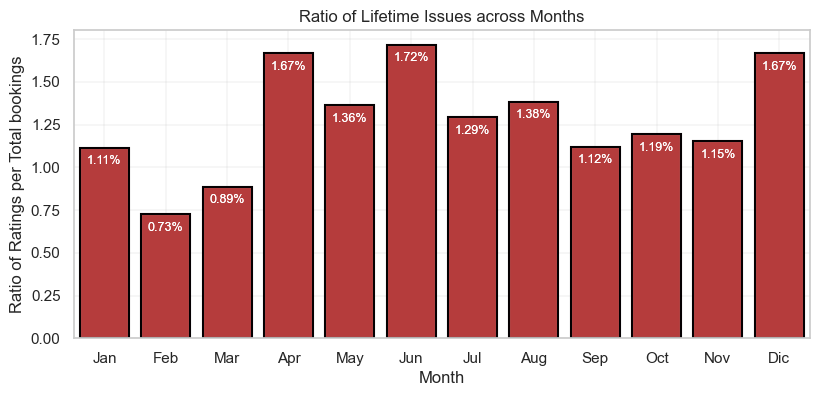

In [231]:
#Let's filter the dataset by ratings <=2


#DATA
#group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year,rb['pickup_date'].dt.month])
group = rb[rb['rating_score']<=2].groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1.columns=['month', 'count_issues', 'mean']
g1

group = book.groupby(book['pickup_date'].dt.month)
g2=group.agg({'booking_id':['count']})
g2.columns=['count']
g2=g2.reset_index()
g2=g2.sort_values(by=['pickup_date'], ascending=True)
g2=g2.reset_index()
g2.drop('index', axis=1, inplace=True)
g2.columns=['month','count_total']
g2

g3=pd.merge(g1,g2,how='left',left_on='month',right_on='month')
g3['ratio']=(g3['count_issues']/g3['count_total'])*100
g3

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=True, order=g1['month'], color='#c92828')

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=False, order=g1['month'], color='#050002')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%', padding=-14, fontsize=9, color='white')

ax.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']) 
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Ratio of Lifetime Issues across Months')

ax.set(xlabel='Month', ylabel='Ratio of Ratings per Total bookings')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


(894, 39)

,month,count_issues,mean
0,1,10,1.400000
1,2,4,1.750000
2,3,13,1.307692
3,4,34,1.294118
4,5,15,1.733333
5,6,17,1.352941
6,7,18,1.277778
7,8,33,1.424242
8,9,15,1.333333
9,10,22,1.454545


,month,count_total
0,1,718
1,2,662
2,3,934
3,4,2110
4,5,1115
5,6,1137
6,7,1825
7,8,2767
8,9,1912
9,10,1881


[Text(0, -14, '1.39%'),
 Text(0, -14, '0.60%'),
 Text(0, -14, '1.39%'),
 Text(0, -14, '1.61%'),
 Text(0, -14, '1.35%'),
 Text(0, -14, '1.50%'),
 Text(0, -14, '0.99%'),
 Text(0, -14, '1.19%'),
 Text(0, -14, '0.78%'),
 Text(0, -14, '1.17%'),
 Text(0, -14, '0.97%'),
 Text(0, -14, '0.98%')]

[Text(0, -14, '1.39%'),
 Text(0, -14, '0.60%'),
 Text(0, -14, '1.39%'),
 Text(0, -14, '1.61%'),
 Text(0, -14, '1.35%'),
 Text(0, -14, '1.50%'),
 Text(0, -14, '0.99%'),
 Text(0, -14, '1.19%'),
 Text(0, -14, '0.78%'),
 Text(0, -14, '1.17%'),
 Text(0, -14, '0.97%'),
 Text(0, -14, '0.98%')]

[[<matplotlib.axis.XTick at 0x13a304b10>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dic')]]

Text(0.5, 1.0, 'Ratio of Issues in months 2023')

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Ratio of Ratings per Total bookings')]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

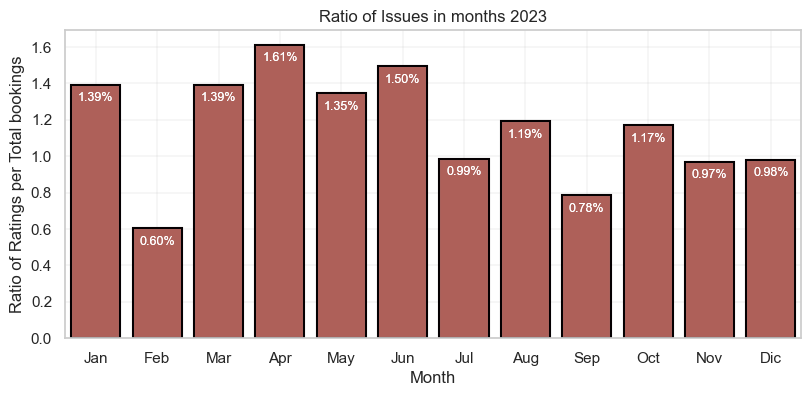

In [232]:
#2023 ONLY!!!
#Let's filter the dataset by ratings <=2
rb[rb['rating_score']<=2].shape

#DATA
#group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year,rb['pickup_date'].dt.month])
group = rb[((rb['rating_score']<=2)&(rb['pickup_date'].dt.year==2023))].groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1.columns=['month', 'count_issues', 'mean']
g1

group = book[book['pickup_date'].dt.year==2023].groupby(book['pickup_date'].dt.month)
g2=group.agg({'booking_id':['count']})
g2.columns=['count']
g2=g2.reset_index()
g2=g2.sort_values(by=['pickup_date'], ascending=True)
g2=g2.reset_index()
g2.drop('index', axis=1, inplace=True)
g2.columns=['month','count_total']
g2

g3=pd.merge(g1,g2,how='left',left_on='month',right_on='month')
g3['ratio']=(g3['count_issues']/g3['count_total'])*100
g3_all_years=g3

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=True, order=g1['month'], color='#bc544b')

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=False, order=g1['month'], color='#050002')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%', padding=-14, fontsize=9, color='white')

ax.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']) 
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Ratio of Issues in months 2023')

ax.set(xlabel='Month', ylabel='Ratio of Ratings per Total bookings')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


In [86]:
#IGNORE

#We are showing that months with more work have more complaints... but we are not showing the proportion.
#We are going to make a line and a hue for year

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count', 'mean']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g2=g2.sort_values(by=['pickup_date'], ascending=True)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 6
height = 7
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
sns.scatterplot(data=g1, x='month',y='count',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

KeyError: 'pickup_date'

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/1451683946.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=g3, x='month', y='ratio', alpha=.5, ci=None, legend=None)


<Axes: xlabel='month', ylabel='ratio'>

Text(0.5, 1.0, 'Ratio of Issues in Months over Years')

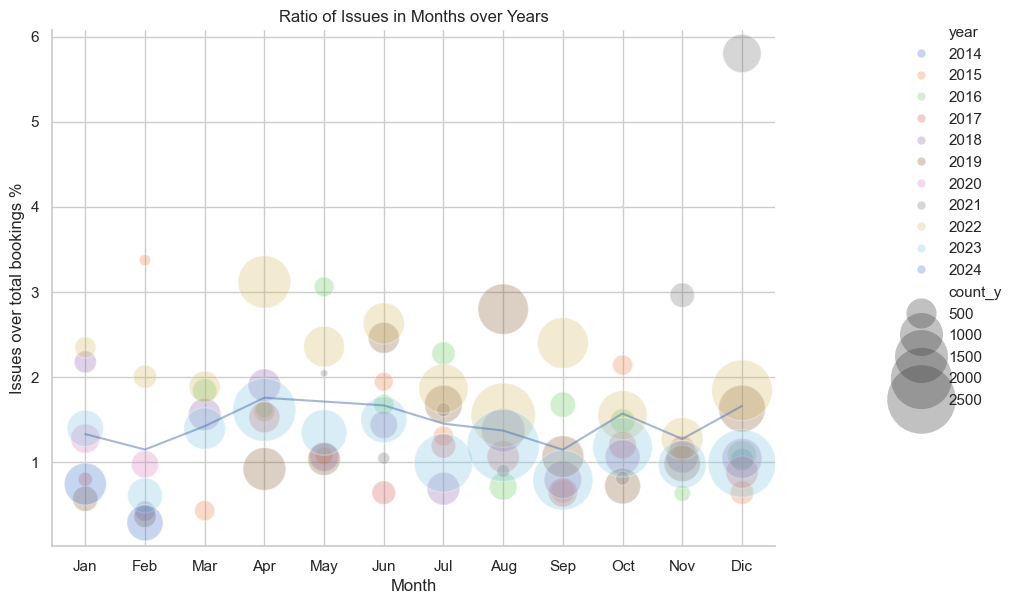

In [234]:
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
#g3

#VISUALIZATION
width = 8
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

# Plot miles per gallon against horsepower with other semantics
ax=sns.relplot(data=g3, x="month", y="ratio", hue="year", size="count_y",
            sizes=(4, 2700), alpha=.3, palette="muted", height=height, aspect=(width/height))

#ax1=sns.barplot(data=g3_all_years, x='month',y='ratio',  fill=True, order=g1['month'], color='grey')
#ax2=sns.barplot(data=g3, x='month',y='ratio',hue='year', palette=sns.color_palette("Paired", n_colors=11))
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
kw = dict(prop="sizes", num=[10,100,500,900])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.00,1))


#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
#ax=sns.barplot(data=g3, x='month',y='ratio',  fill=True, order=g1['month'], color='#c92828')

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
#ax=sns.barplot(data=g3, x='month',y='ratio',  fill=False, order=g1['month'], color='#050002')

#ax.grid(linewidth=0.25)
#Set datalabels
#for i in ax1.containers:
#    ax1.bar_label(i,fmt ='%.2f%%', padding=30, fontsize=9, color='black')
sns.lineplot(data=g3, x='month', y='ratio', alpha=.5, ci=None, legend=None)
ax.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']) 
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(-1.5,13.5)

#legend = ax.legend(*relplot.legend_elements(**kw), title="Count", fontsize=12,
#                    loc='upper right', bbox_to_anchor=(1.5,1), labelspacing=2,
#                   frameon=False)


plt.title('Ratio of Issues in Months over Years')

ax.set(xlabel='Month', ylabel='Issues over total bookings %')
#plt.setp(ax.patches, linewidth=1.5 )
plt.show()




,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

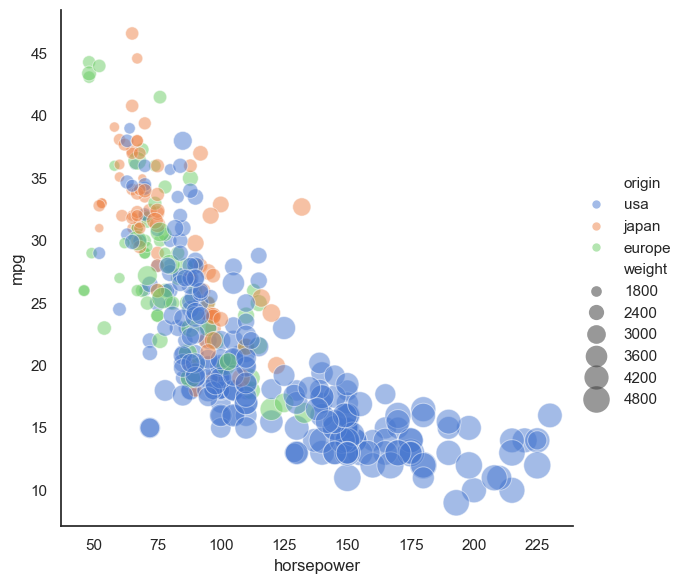

In [107]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

mpg.head()
mpg.dtypes

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/749039642.py:34: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  ax=sns.lineplot(data=g3, x='month',y='proportion',hue='year', palette=sns.color_palette("Paired", n_colors=11))


[[<matplotlib.axis.YTick at 0x12911af90>,

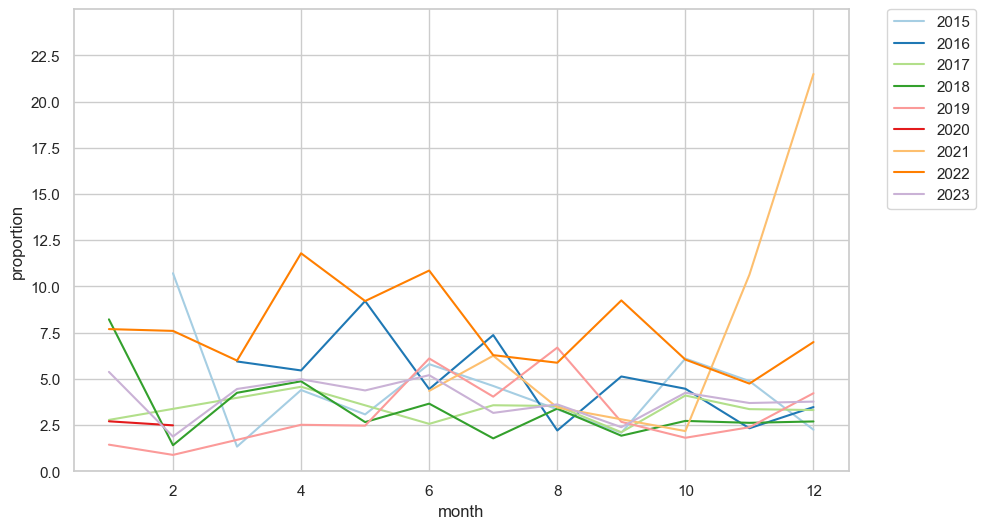

In [88]:
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g2=group.agg({'rating_score':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['year','month'], right_on=['year','month'] )
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.lineplot(data=g3, x='month',y='proportion',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=25)
ax.set(yticks=np.arange(0, 25, 2.5))
#ax.set_xlim(xmin=-1.5,xmax=12.5)




/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/199234782.py:34: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='vehicle_category',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11),s=100)


(-1.0, 5.0)

Text(0.5, 1.0, 'Ratio Bad Ratings over total Bookings')

[Text(0.5, 0, 'Vehicle Category'),
 Text(0, 0.5, 'Issues over total bookings %')]

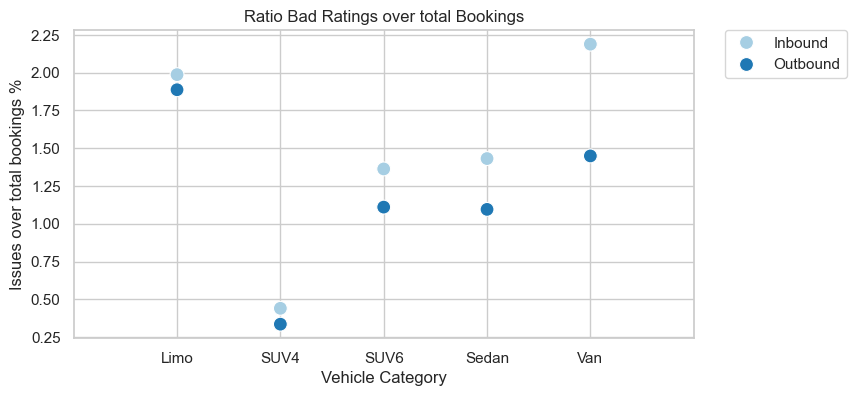

In [185]:
#By Vehicle
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)].groupby([rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = book.groupby(['vehicle_category','in_or_outbound'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2


g3=pd.merge(g1, g2, how='inner', left_on=['vehicle_category','in_or_outbound'], right_on=['vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#g3
#g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='vehicle_category',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11),s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 10, 1))
ax.set_xlim(xmin=-1,xmax=5)
plt.title('Ratio Bad Ratings over total Bookings')
ax.set(xlabel='Vehicle Category', ylabel='Issues over total bookings %')

,day_in_advance_groups,in_or_outbound,count_g1
0,G01_12 hour,Inbound,5
1,G01_12 hour,Outbound,1
2,G02_24 hour,Inbound,24
3,G02_24 hour,Outbound,14
4,G03_48 hour,Inbound,49
5,G03_48 hour,Outbound,7
6,G04_4 day,Inbound,70
7,G04_4 day,Outbound,11
8,G05_1 week,Inbound,57
9,G05_1 week,Outbound,26


,day_in_advance_groups,in_or_outbound,count_g2
0,G01_12 hour,Inbound,263
1,G01_12 hour,Outbound,136
2,G02_24 hour,Inbound,1719
3,G02_24 hour,Outbound,964
4,G03_48 hour,Inbound,3104
5,G03_48 hour,Outbound,1011
6,G04_4 day,Inbound,3911
7,G04_4 day,Outbound,738
8,G05_1 week,Inbound,4064
9,G05_1 week,Outbound,1666


,day_in_advance_groups,in_or_outbound,count_g1,count_g2,proportion
0,G01_12 hour,Inbound,5,263,1.901141
1,G01_12 hour,Outbound,1,136,0.735294
2,G02_24 hour,Inbound,24,1719,1.396161
3,G02_24 hour,Outbound,14,964,1.452282
4,G03_48 hour,Inbound,49,3104,1.578608
5,G03_48 hour,Outbound,7,1011,0.692384
6,G04_4 day,Inbound,70,3911,1.789824
7,G04_4 day,Outbound,11,738,1.490515
8,G05_1 week,Inbound,57,4064,1.402559
9,G05_1 week,Outbound,26,1666,1.560624


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/3289483218.py:31: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11), s=100)


(0.0, 2.0)

[[<matplotlib.axis.YTick at 0x1363cb510>,

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'G01_12 hour'),
  Text(1, 0, 'G02_24 hour'),
  Text(2, 0, 'G03_48 hour'),
  Text(3, 0, 'G04_4 day'),
  Text(4, 0, 'G05_1 week'),
  Text(5, 0, 'G06_2 week'),
  Text(6, 0, 'G07_1 month'),
  Text(7, 0, 'G08_2 month'),
  Text(8, 0, 'G09_3 month'),
  Text(9, 0, 'G10_6 month'),
  Text(10, 0, 'G11_> 6 month')])

Text(0.5, 1.0, 'Ratio Bad Ratings over total Bookings across Days of Advance')

[Text(0.5, 0, 'Days in Advance Category'),
 Text(0, 0.5, 'Issues over total bookings %')]

'\nThere are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.\n'

,day_in_advance_groups,in_or_outbound,count_g2
0,G01_12 hour,Inbound,263
1,G01_12 hour,Outbound,136
2,G02_24 hour,Inbound,1719
3,G02_24 hour,Outbound,964
4,G03_48 hour,Inbound,3104
5,G03_48 hour,Outbound,1011
6,G04_4 day,Inbound,3911
7,G04_4 day,Outbound,738
8,G05_1 week,Inbound,4064
9,G05_1 week,Outbound,1666


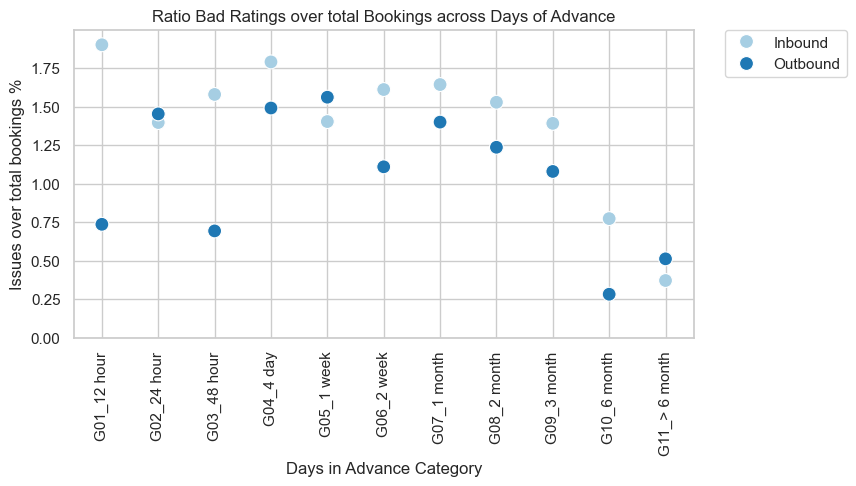

In [189]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)].groupby(['day_in_advance_groups','in_or_outbound'])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
g1

group = book.groupby(['day_in_advance_groups','in_or_outbound'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
g2

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','in_or_outbound'], right_on=['day_in_advance_groups','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100
g3

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11), s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=2)
ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
plt.title('Ratio Bad Ratings over total Bookings across Days of Advance')
ax.set(xlabel='Days in Advance Category', ylabel='Issues over total bookings %')
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''
g2

,day_in_advance_groups,count_g1
0,G01_12 hour,6
1,G02_24 hour,38
2,G03_48 hour,57
3,G04_4 day,81
4,G05_1 week,84
5,G06_2 week,174
6,G07_1 month,225
7,G08_2 month,136
8,G09_3 month,56
9,G10_6 month,26


,day_in_advance_groups,count_g2
0,G01_12 hour,399
1,G02_24 hour,2690
2,G03_48 hour,4127
3,G04_4 day,4682
4,G05_1 week,5744
5,G06_2 week,12882
6,G07_1 month,14878
7,G08_2 month,9890
8,G09_3 month,4552
9,G10_6 month,4952


,day_in_advance_groups,count_g1,count_g2,proportion
0,G01_12 hour,6,399,1.503759
1,G02_24 hour,38,2690,1.412639
2,G03_48 hour,57,4127,1.381149
3,G04_4 day,81,4682,1.730030
4,G05_1 week,84,5744,1.462396
5,G06_2 week,174,12882,1.350722
6,G07_1 month,225,14878,1.512300
7,G08_2 month,136,9890,1.375126
8,G09_3 month,56,4552,1.230228
9,G10_6 month,26,4952,0.525040


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/2705574666.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', palette=sns.color_palette("Paired", n_colors=11), s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 2.0)

[[<matplotlib.axis.YTick at 0x1364e9e50>,

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'G01_12 hour'),
  Text(1, 0, 'G02_24 hour'),
  Text(2, 0, 'G03_48 hour'),
  Text(3, 0, 'G04_4 day'),
  Text(4, 0, 'G05_1 week'),
  Text(5, 0, 'G06_2 week'),
  Text(6, 0, 'G07_1 month'),
  Text(7, 0, 'G08_2 month'),
  Text(8, 0, 'G09_3 month'),
  Text(9, 0, 'G10_6 month'),
  Text(10, 0, 'G11_> 6 month')])

Text(0.5, 1.0, 'Ratio Bad Ratings over total Bookings across Days of Advance')

[Text(0.5, 0, 'Days in Advance Category'),
 Text(0, 0.5, 'Issues over total bookings %')]

'\nThere are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.\n'

,day_in_advance_groups,count_g2
0,G01_12 hour,399
1,G02_24 hour,2690
2,G03_48 hour,4127
3,G04_4 day,4682
4,G05_1 week,5744
5,G06_2 week,12882
6,G07_1 month,14878
7,G08_2 month,9890
8,G09_3 month,4552
9,G10_6 month,4952


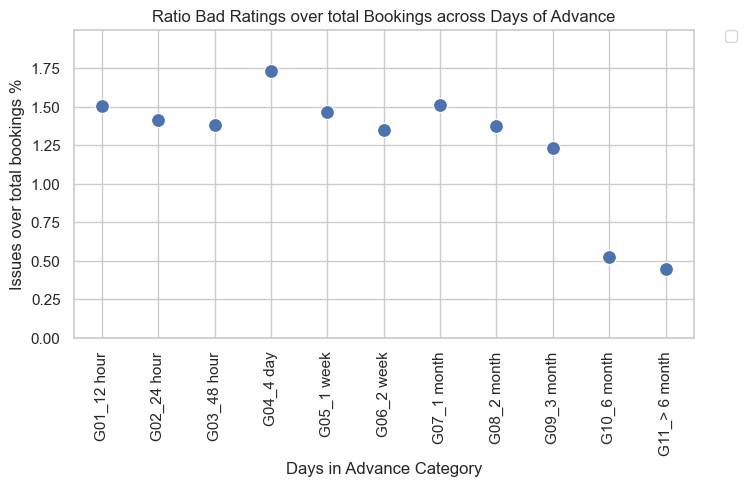

In [191]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)].groupby(['day_in_advance_groups'])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
g1

group = book.groupby(['day_in_advance_groups'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
g2

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups'], right_on=['day_in_advance_groups'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100
g3

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', palette=sns.color_palette("Paired", n_colors=11), s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=2)
ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
plt.title('Ratio Bad Ratings over total Bookings across Days of Advance')
ax.set(xlabel='Days in Advance Category', ylabel='Issues over total bookings %')
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''
g2

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/1761288570.py:36: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', style='vehicle_category', palette=sns.color_palette("Paired", n_colors=11))


'\nThere are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.\n'

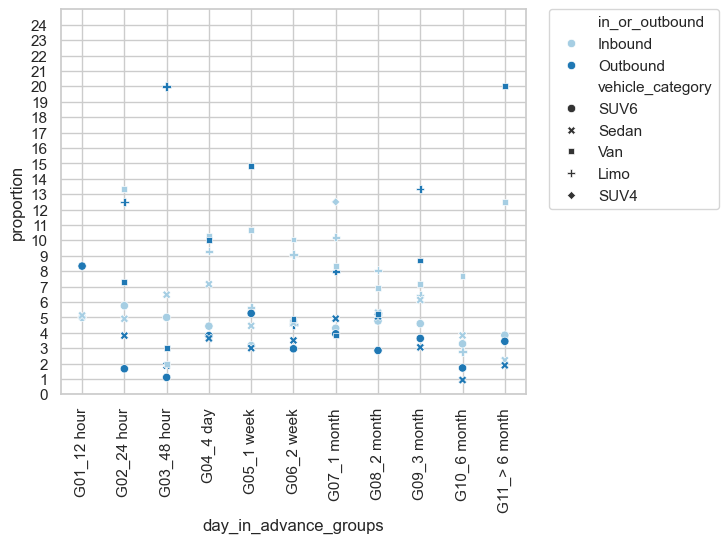

In [91]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100


group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g2=group.agg({'rating_score':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','vehicle_category','in_or_outbound'], right_on=['day_in_advance_groups','vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 6
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', style='vehicle_category', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=25)
ax.set(yticks=np.arange(0, 25, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''

,day_in_advance_groups,vehicle_category,in_or_outbound,count_g1
0,G01_12 hour,SUV6,Inbound,1
1,G01_12 hour,SUV6,Outbound,1
2,G01_12 hour,Sedan,Inbound,2
3,G01_12 hour,Van,Inbound,2
4,G02_24 hour,Limo,Outbound,1
5,G02_24 hour,SUV4,Outbound,1
6,G02_24 hour,SUV6,Inbound,11
7,G02_24 hour,SUV6,Outbound,4
8,G02_24 hour,Sedan,Inbound,11
9,G02_24 hour,Sedan,Outbound,5


,day_in_advance_groups,vehicle_category,in_or_outbound,count_g2
0,G01_12 hour,Limo,Inbound,1
1,G01_12 hour,SUV4,Inbound,13
2,G01_12 hour,SUV4,Outbound,7
3,G01_12 hour,SUV6,Inbound,75
4,G01_12 hour,SUV6,Outbound,51
5,G01_12 hour,Sedan,Inbound,158
6,G01_12 hour,Sedan,Outbound,63
7,G01_12 hour,Van,Inbound,16
8,G01_12 hour,Van,Outbound,15
9,G02_24 hour,Limo,Inbound,43


(0.0, 4.55)

[[<matplotlib.axis.YTick at 0x1366a5c90>,

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'G01_12 hour'),
  Text(1, 0, 'G02_24 hour'),
  Text(2, 0, 'G03_48 hour'),
  Text(3, 0, 'G04_4 day'),
  Text(4, 0, 'G05_1 week'),
  Text(5, 0, 'G06_2 week'),
  Text(6, 0, 'G07_1 month'),
  Text(7, 0, 'G08_2 month'),
  Text(8, 0, 'G09_3 month'),
  Text(9, 0, 'G10_6 month'),
  Text(10, 0, 'G11_> 6 month')])

'Because SUV4 started being available since October 27th 2023 and customers\nand most bookings have taken place on the busiest times, SUV4 lack quiet time\nto compensate a bit like the other can.\nAlso the nature of SUV4 is esentially the same as Sedan and SUV 6 so no different\nresults should be expected.\n'

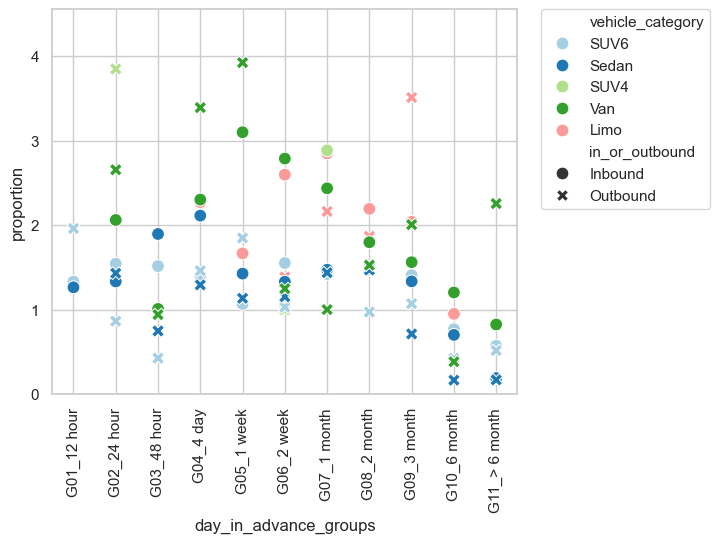

In [194]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100


group = rb[(rb['rating_score']<=2)].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
g1

group = book.groupby(['day_in_advance_groups','vehicle_category','in_or_outbound'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
g2

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','vehicle_category','in_or_outbound'], right_on=['day_in_advance_groups','vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

g3=g3[g3['count_g2']>20]

#VISUALIZATION
width = 6
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='vehicle_category', style='in_or_outbound', palette=sns.color_palette("Paired", n_colors=5), s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=4.55)
ax.set(yticks=np.arange(0, 4.5, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)

'''Because SUV4 started being available since October 27th 2023 and customers
and most bookings have taken place on the busiest times, SUV4 lack quiet time
to compensate a bit like the other can.
Also the nature of SUV4 is esentially the same as Sedan and SUV 6 so no different
results should be expected.
'''

Text(0.5, 1.0, 'Distribution of Days in advance')

[Text(0.5, 0, 'Days in Advance')]

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

(-1.5, 360.0)

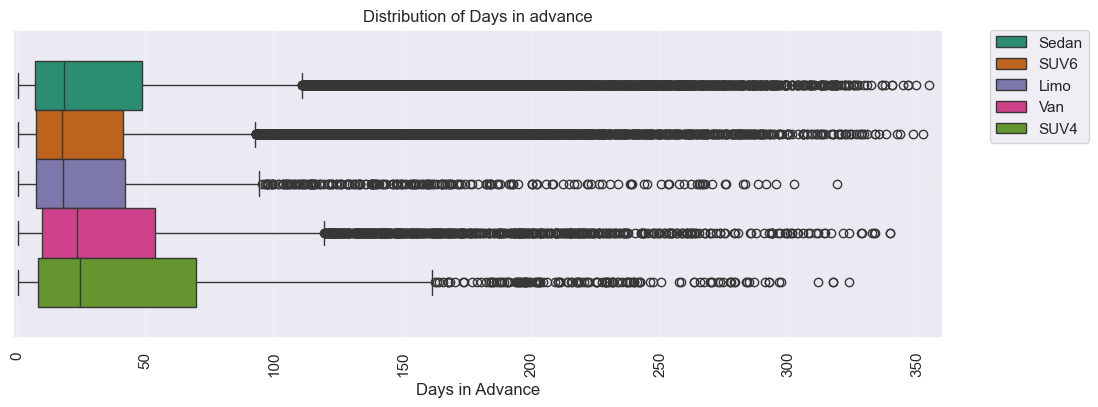

In [203]:
#NEXT BOXPLOT DAYS_IN_ADVANCE BY VEHICLE

#VISUALIZATION
width = 12
height = 4

sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(width, height)})
ax=sns.boxplot(data=book,x='days_in_advance', hue='vehicle_category', palette='Dark2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
plt.title('Distribution of Days in advance')
ax.set(xlabel='Days in Advance')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
#ax.set(xticks=np.arange(0, 360, 7))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
ax.set_xlim(xmin=-1.5,xmax=360)
#plt.xticks(rotation=90)


Text(0.5, 1.0, 'Distribution of Days in advance')

[Text(0.5, 0, 'Days in Advance')]

[[<matplotlib.axis.XTick at 0x134bde6d0>,

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160]),
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150'),
  Text(160, 0, '160')])

(-1.5, 169.0)

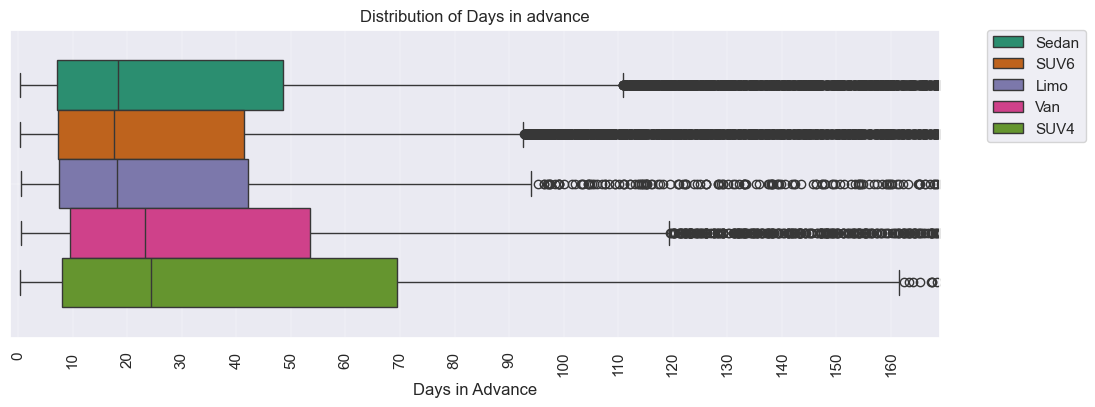

In [206]:
#NEXT BOXPLOT DAYS_IN_ADVANCE BY VEHICLE

#VISUALIZATION
width = 12
height = 4

sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(width, height)})
ax=sns.boxplot(data=book,x='days_in_advance', hue='vehicle_category', palette='Dark2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
plt.title('Distribution of Days in advance')
ax.set(xlabel='Days in Advance')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
ax.set(xticks=np.arange(0, 170, 10))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
ax.set_xlim(xmin=-1.5,xmax=169)
#plt.xticks(rotation=90)


In [95]:
g=rb[rb['vehicle_category']=='SUV4']
g.sort_values(by='booking_date', ascending=True).describe()

,pickup_date,number_of_passenger,total_price,total_comission,total_driver,last_update_date,booking_date,rating_score,rating_date,days_in_advance,address_lat,address_loc
count,207,207.000000,207.000000,207.0,207.000000,207,207,207.000000,207,207.000000,22.000000,22.000000
mean,2023-12-21 11:53:54.782608640,3.521739,128.884058,12.5,89.734300,2023-12-20 19:13:01.739130624,2023-12-05 15:28:31.594203136,4.787440,2023-12-22 16:52:41.159420416,15.850963,38.291317,-75.257147
min,2023-10-28 18:00:00,2.000000,113.000000,12.5,75.000000,2023-10-28 09:45:00,2023-10-27 10:03:00,1.000000,2023-10-29 00:03:00,0.297917,-2.199279,-96.892700
25%,2023-12-06 14:32:30,3.000000,120.000000,12.5,85.000000,2023-12-05 14:37:30,2023-11-18 11:02:00,5.000000,2023-12-07 11:44:30,4.882292,40.747088,-73.994183
50%,2023-12-23 17:00:00,4.000000,130.000000,12.5,90.000000,2023-12-22 18:00:00,2023-12-02 11:58:00,5.000000,2023-12-24 02:43:00,11.191667,40.754357,-73.990689
75%,2024-01-04 14:15:00,4.000000,130.000000,12.5,90.000000,2024-01-03 14:15:00,2023-12-22 07:27:30,5.000000,2024-01-05 01:41:30,24.916319,40.764068,-73.982956
max,2024-02-04 15:05:00,4.000000,182.000000,12.5,130.000000,2024-02-05 09:23:00,2024-02-03 03:22:00,5.000000,2024-02-05 08:46:00,64.798611,41.560640,-73.041630
std,NaN,0.695520,11.252447,0.0,8.232185,NaN,NaN,0.663352,NaN,14.856208,9.408095,5.000070


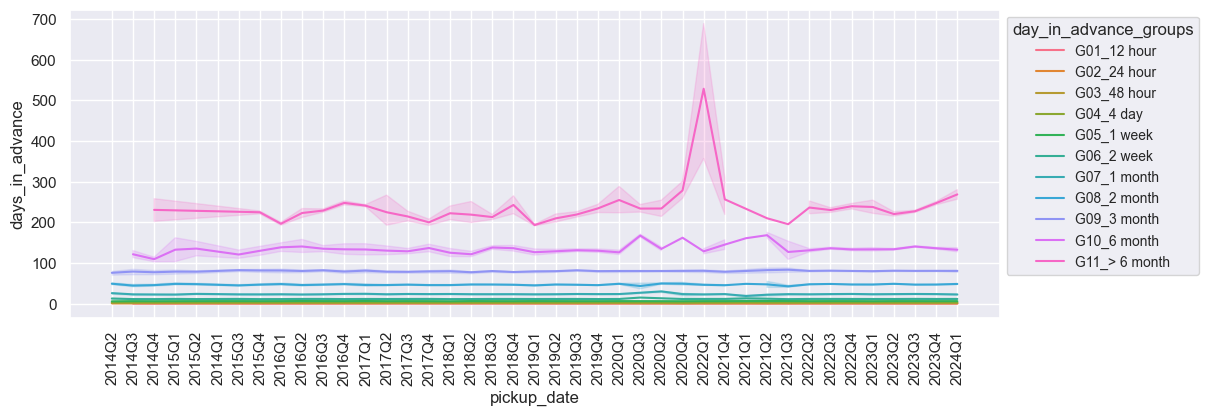

In [96]:
book.dtypes
dd=book[['pickup_date','days_in_advance','day_in_advance_groups']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('Q').astype(str)
dd['day_in_advance_groups']=dd['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=dd, x=dd['pickup_date'] ,y='days_in_advance', hue='day_in_advance_groups')
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


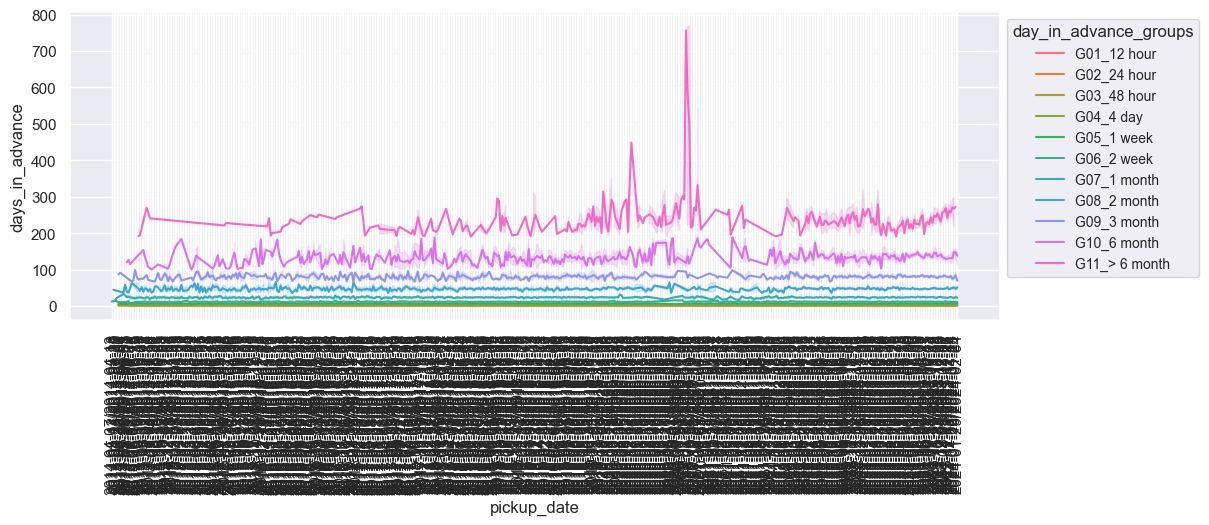

In [97]:
book.dtypes
dd=book[['pickup_date','days_in_advance','day_in_advance_groups']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('W').astype(str)
dd['day_in_advance_groups']=dd['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=dd, x=dd['pickup_date'] ,y='days_in_advance', hue='day_in_advance_groups')
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


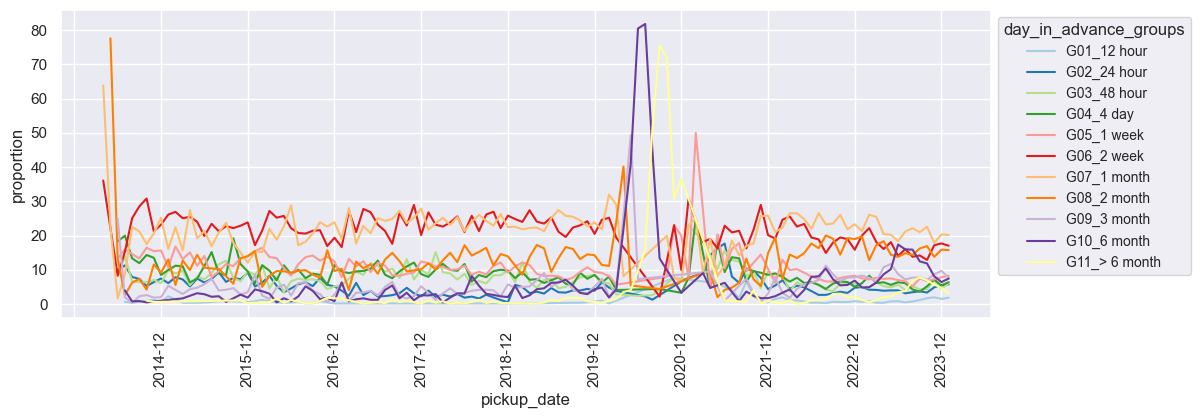

In [98]:
book.dtypes
dd=book[['pickup_date','day_in_advance_groups', 'booking_id']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('M').astype(str)
dd['booking_id']=1

dd_total=book[['pickup_date','booking_id']]
dd_total=dd_total[dd_total['pickup_date']<'2024-02-01']
dd_total['pickup_date']=dd_total['pickup_date'].dt.to_period('M').astype(str)
dd_total['booking_id']=1

d1=dd.groupby(['pickup_date', 'day_in_advance_groups'])
d1gru=d1.agg({'booking_id':['count']})
d1gru.columns=['count_dd']
d1gru.reset_index(inplace=True)
d1gru

d2=dd_total.groupby(['pickup_date'])
d2gru=d2.agg({'booking_id':['count']})
d2gru.columns=['count_total']
d2gru.reset_index(inplace=True)
d2gru


gdata=pd.merge(d1gru,d2gru, how='left', left_on='pickup_date', right_on='pickup_date')
gdata['proportion']=gdata['count_dd']/gdata['count_total']*100
gdata['day_in_advance_groups']=gdata['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=gdata, x='pickup_date' ,y='proportion', hue='day_in_advance_groups', palette=sns.color_palette("Paired", n_colors=11))

#ax.set(yticks=np.arange(0, 360, 5))
ax.set(xticks=np.arange(-4, 124, 12))

plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


In [208]:
#Time from Booking to Pickup
#Calculate number of days.
#Express it in groups that make sense.

def time_delta_only_in_days(td):
    if td.days+((td.seconds/3600)/24) <= 0.29:
        return np.nan
    else:
        return td.days+((td.seconds/3600)/24) #convert seconds to hours and hours to days.

def make_days_in_advance_groups_2(n):
    if (n<=1.2):
        return 'G01_24 hour'
    elif (n>1.2)&(n<=8):
        return 'G02_1 week'
    elif (n>8) & (n<=16):
        return 'G03_2 week'
    elif (n>16) & (n<=34):
        return 'G04_1 month'
    elif (n>34) & (n<=190):
        return 'G05_6 month'
    elif (n>190):
        return 'G06_> 6 month'
    else:
        return np.nan

#Applied to Bookings that have ratings: 
rb['days_in_advance']=pd.DataFrame(rb['pickup_date']-rb['booking_date'])
rb['days_in_advance']=rb['days_in_advance'].apply(time_delta_only_in_days)
print(rb['days_in_advance'].describe())

rb['day_in_advance_groups_2']=rb['days_in_advance'].apply(make_days_in_advance_groups_2)
rb['day_in_advance_groups_2'].value_counts(dropna=False)

#rb[rb['days_in_advance']<.4].sort_values(by='days_in_advance')


#Applied to all Bookings
book['days_in_advance']=pd.DataFrame(book['pickup_date']-book['booking_date'])
book['days_in_advance']=book['days_in_advance'].apply(time_delta_only_in_days)
print(book['days_in_advance'].describe())

book['day_in_advance_groups_2']=book['days_in_advance'].apply(make_days_in_advance_groups_2)
book['day_in_advance_groups_2'].value_counts(dropna=False)

#book[book['days_in_advance']<.25].sort_values(by='days_in_advance')


count    19999.000000
mean        30.504223
std         39.563313
min          0.292361
25%          6.972222
50%         16.423611
75%         36.985069
max        340.183333
Name: days_in_advance, dtype: float64


day_in_advance_groups_2
G05_6 month      5212
G04_1 month      4776
G02_1 week       4684
G03_2 week       4147
G01_24 hour       944
G06_> 6 month     236
NaN                69
Name: count, dtype: int64

count    67050.000000
mean        39.091079
std         53.525333
min          0.292361
25%          7.416319
50%         18.411458
75%         46.065625
max        769.075694
Name: days_in_advance, dtype: float64


day_in_advance_groups_2
G05_6 month      19394
G04_1 month      14878
G02_1 week       14553
G03_2 week       12882
G01_24 hour       3089
G06_> 6 month     2254
NaN                262
Name: count, dtype: int64

In [ ]:
dd=book[['booking_date','day_in_advance_groups_2', 'booking_id']]
dd=dd[(dd['booking_date']>'2017-12-01')&(dd['booking_date']<'2021-10-01')]
dd['booking_date']=dd['booking_date'].dt.to_period('M').astype(str)
dd['booking_id']=1

dd_total=book[['booking_date','booking_id']]
dd_total=dd_total[(dd_total['booking_date']>'2017-12-01')&(dd_total['booking_date']<'2021-10-01')]
dd_total['booking_date']=dd_total['booking_date'].dt.to_period('M').astype(str)
dd_total['booking_id']=1

d1=dd.groupby(['booking_date', 'day_in_advance_groups_2'])
d1gru=d1.agg({'booking_id':['count']})
d1gru.columns=['count_dd']
d1gru.reset_index(inplace=True)
#d1gru

d2=dd_total.groupby(['booking_date'])
d2gru=d2.agg({'booking_id':['count']})
d2gru.columns=['count_total']
d2gru.reset_index(inplace=True)
#d2gru


gdata=pd.merge(d1gru,d2gru, how='left', left_on='booking_date', right_on='booking_date')
gdata['proportion']=gdata['count_dd']/gdata['count_total']*100
gdata['day_in_advance_groups_2']=gdata['day_in_advance_groups_2'].astype('category')
gdata

ax=sns.lineplot(data=gdata, x='booking_date' ,y='proportion', hue='day_in_advance_groups_2', palette=sns.color_palette("Paired", n_colors=11))
ax.set(xlabel='Year-Month', ylabel='Percentage %')
#ax.set(yticks=np.arange(0, 30, 5))
#ax.set(xticks=np.arange(2, 24, 1))

plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


'''
There are some interesting things going on here with the duration that might require further study.
I see the 1 month and 2 month lines have complementary behavior. When one goes up the other goes down.

The six month grows towards a 6 month big date and then goes down and the smaller ones pickup.

Last minute reservations go up when there are a lot of people. blue

'''

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/1400615930.py:15: UserWarning: The palette list has more values (11) than needed (6), which may not be intended.
  ax=sns.histplot(


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-04'),
  Text(16, 0, '2020-06'),
  Text(17, 0, '2020-07'),
  Text(18, 0, '2020-08'),
  Text(19, 0, '2020-09'),
  Text(20, 0, '2020-10'),
  Text(21, 0, '2020-11'),
  Text(22, 0, '2020-12'),
  Text(23, 0, '2021-01'),
  Text(24, 0, '2021-02'),
  Text(25, 0, '2021-03'),
  Text(26, 0, '2021-04'),
  Text(27, 0, '2021-05'),
  Text(28, 0, '2021-06'),
  Text(29, 0, '2021-07'),

Text(0.5, 1.0, 'Effect of Covid in the booking habits')

[Text(0.5, 0, 'Months')]

[Text(0, 0.5, '% of each category')]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-04'),
  Text(16, 0, '2020-06'),
  Text(17, 0, '2020-07'),
  Text(18, 0, '2020-08'),
  Text(19, 0, '2020-09'),
  Text(20, 0, '2020-10'),
  Text(21, 0, '2020-11'),
  Text(22, 0, '2020-12'),
  Text(23, 0, '2021-01'),
  Text(24, 0, '2021-02'),
  Text(25, 0, '2021-03'),
  Text(26, 0, '2021-04'),
  Text(27, 0, '2021-05'),
  Text(28, 0, '2021-06'),
  Text(29, 0, '2021-07'),

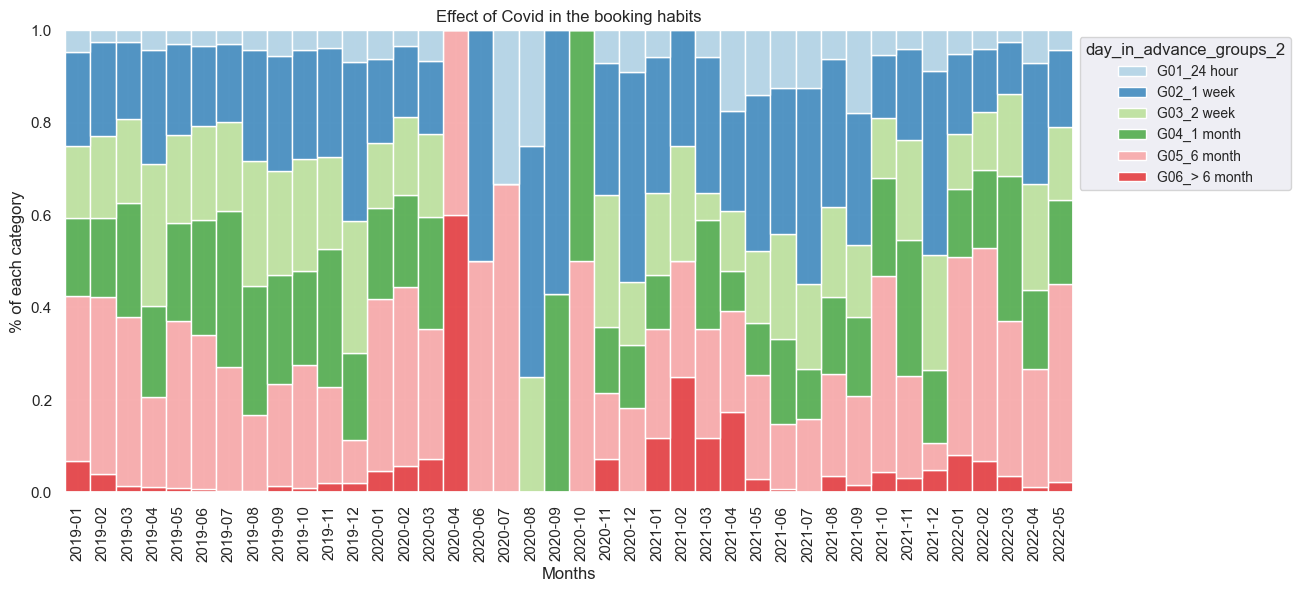

In [222]:
df_stacks=book[['booking_date','day_in_advance_groups_2', 'booking_id']]
df_stacks=df_stacks[~(df_stacks['day_in_advance_groups_2'].isna())]
df_stacks=df_stacks[(df_stacks['booking_date']>'2019-1-01')&(df_stacks['booking_date']<'2022-6-01')]
df_stacks['booking_date']=df_stacks['booking_date'].dt.to_period('M').astype(str)
df_stacks['day_in_advance_groups_2']=df_stacks['day_in_advance_groups_2'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='booking_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="booking_date", hue="day_in_advance_groups_2",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
ax.grid(linewidth=0.25)

plt.title('Effect of Covid in the booking habits')
ax.set(xlabel='Months')
ax.set(ylabel='''% of each category''')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
#ax.set(xticks=np.arange(0, 170, 10))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=169)
#plt.xticks(rotation=90)

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/838717496.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(


(array([17897., 18078., 18262., 18444., 18628., 18809., 18993., 19174.]),
 [Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07')])

Text(0.5, 1.0, 'Effect of Covid in the booking habits')

[Text(0.5, 0, 'Months')]

[Text(0, 0.5, '% of each category')]

(array([17897., 18078., 18262., 18444., 18628., 18809., 18993., 19174.]),
 [Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07')])

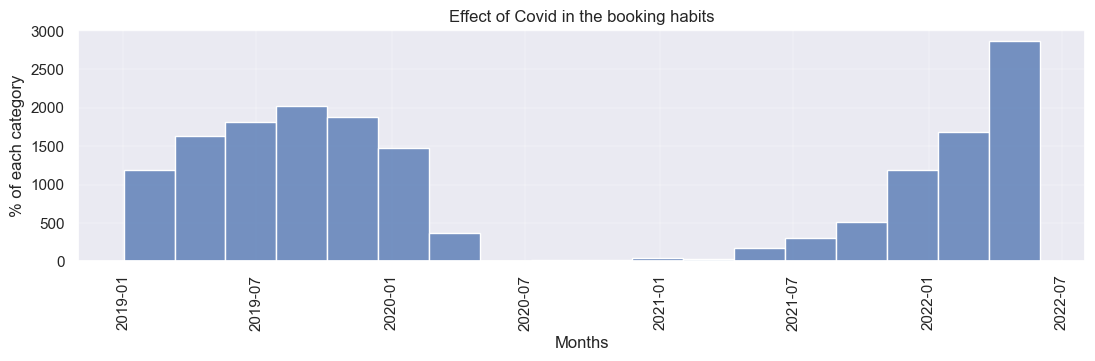

In [225]:
#VISUALIZATION
width = 13
height = 2
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=book[((book['booking_date']>'2019-1-01')&(book['booking_date']<'2022-6-01'))],
    x="booking_date", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    )
plt.xticks(rotation=90)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
ax.grid(linewidth=0.25)

plt.title('Effect of Covid in the booking habits')
ax.set(xlabel='Months')
ax.set(ylabel='''% of each category''')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
#ax.set(xticks=np.arange(0, 170, 10))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=169)
#plt.xticks(rotation=90)